In [72]:
import pandas as pd
import numpy as np
import tensorflow as tf

df1 = pd.read_json('../data/1089_M-1_A.json').replace(np.nan, 0)
df2 = pd.read_json('../data/2010_C2-1090_A.json').replace(np.nan, 0)
df = pd.concat([df1, df2])
df

,contestId,index,name,rating,timeLimit,memoryLimit,statement,tags.data structures,tags.greedy,tags.implementation,...,tags.graph matchings,tags.ternary search,tags.*special,tags.chinese remainder theorem,tags.fft,tags.meet-in-the-middle,tags.matrices,tags.2-sat,tags.expression parsing,tags.schedules
0,1089,K,King Kog's Reception,2400.0,2,512,King Kog got annoyed of the usual laxity of hi...,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1089,J,JS Minification,3200.0,1,512,International Coding Procedures Company ICPC w...,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1089,I,Interval-Free Permutations,2600.0,1,512,Consider a permutation p1 p2 dots pn of intege...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1089,G,Guest Student,1500.0,1,512,Berland State University invites people from a...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1089,F,Fractions,1900.0,1,512,You are given a positive integer n Find a sequ...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4969,1090,M,The Pleasant Walk,1000.0,1,512,There are n houses along the road where Anya l...,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4970,1090,J,Two Prefixes,2600.0,1,512,Misha didnt do his math homework for todays le...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4971,1090,D,Similar Arrays,1800.0,1,512,Vasya had an array of n integers each element ...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4972,1090,C,New Year Presents,2400.0,2,512,Santa has prepared boxes with presents for n k...,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
# Get all columns that start with 'tags.'
tag_columns = [col for col in df.columns if col.startswith('tags.')]
print('tag_columns:', tag_columns)
print('tag_columns count:', len(tag_columns))
# Get the dataframe data in those columns
tags_df = df[tag_columns]
tags_df

tag_columns: ['tags.data structures', 'tags.greedy', 'tags.implementation', 'tags.combinatorics', 'tags.math', 'tags.dp', 'tags.trees', 'tags.bitmasks', 'tags.constructive algorithms', 'tags.interactive', 'tags.sortings', 'tags.brute force', 'tags.strings', 'tags.geometry', 'tags.flows', 'tags.graphs', 'tags.binary search', 'tags.hashing', 'tags.probabilities', 'tags.number theory', 'tags.dsu', 'tags.shortest paths', 'tags.games', 'tags.string suffix structures', 'tags.dfs and similar', 'tags.two pointers', 'tags.divide and conquer', 'tags.graph matchings', 'tags.ternary search', 'tags.*special', 'tags.chinese remainder theorem', 'tags.fft', 'tags.meet-in-the-middle', 'tags.matrices', 'tags.2-sat', 'tags.expression parsing', 'tags.schedules']
tag_columns count: 37


,tags.data structures,tags.greedy,tags.implementation,tags.combinatorics,tags.math,tags.dp,tags.trees,tags.bitmasks,tags.constructive algorithms,tags.interactive,...,tags.graph matchings,tags.ternary search,tags.*special,tags.chinese remainder theorem,tags.fft,tags.meet-in-the-middle,tags.matrices,tags.2-sat,tags.expression parsing,tags.schedules
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4969,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4970,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4971,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4972,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
y_data = tags_df.values
y_data

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [75]:
y_data.shape

(9553, 37)

In [112]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

wordbag = set()
statements = df['statement'].apply(str.lower)

stop_words = set(stopwords.words('english'))
latex = []

tokens = [[word for word in word_tokenize(st) if word not in stop_words and word not in latex] for st in statements]

for st_tok in tokens:
    wordbag.update(set(st_tok))
len(wordbag)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\enriq\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\enriq\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\enriq\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


32250

In [114]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

word2idx = {word: i + 1 for i, word in enumerate(wordbag)}

x_data = [[word2idx[word] for word in st_tok] for st_tok in tokens]

x_data = pad_sequences(x_data, padding='post')
x_data

array([[17962,   161,   649, ...,     0,     0,     0],
       [25967, 24415,  2212, ...,     0,     0,     0],
       [11467, 25304, 29582, ...,     0,     0,     0],
       ...,
       [29225, 18652,   250, ...,     0,     0,     0],
       [23923, 31875,   686, ...,     0,     0,     0],
       [29552, 23221,   250, ...,     0,     0,     0]])

In [104]:
from gensim.models import Word2Vec
cbow_model = Word2Vec(sentences=tokens, vector_size=100, window=5, sg=0)

for st_tok in tokens:
    for i in range()
    np.array([[cbow_model.wv[word] for word in st_tok if word in cbow_model.wv] or [np.zeros(100)] ])
    x_data_emb
x_data_emb.shape

In [115]:
x_data.shape

(9553, 805)

In [116]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size=0.1, test_size=0.05, random_state=24)

In [117]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((955, 805), (955, 37), (478, 805), (478, 37))

In [120]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, SimpleRNN, Dropout, GRU, Conv1D, MaxPooling1D

output_size = y_train.shape[1]
embedding_size = 100

model = Sequential()
model.add(Embedding(len(wordbag)+1, embedding_size, input_shape=(x_train.shape[1],)))
model.add(Conv1D(32, 5, strides=1, activation='relu', padding='same'))
model.add(MaxPooling1D(5))
model.add(Bidirectional(LSTM(256, recurrent_dropout=0.5, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Conv1D(16, 5, activation='relu', padding='same'))
model.add(MaxPooling1D(5))
model.add(Bidirectional(LSTM(128, recurrent_dropout=0.5, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(64, recurrent_dropout=0.5)))
model.add(Dense(output_size, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['binary_accuracy', 'f1_score'])
model.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_18 (Embedding)        │ (None, 805, 100)       │     3,225,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 805, 32)        │        16,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 161, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 161, 512)       │       591,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 161, 512)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 161, 16)        │        40,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 32, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 32, 256)        │       148,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 128)            │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 37)             │         4,773 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,191,585 (15.99 MB)

 Trainable params: 4,191,585 (15.99 MB)

 Non-trainable params: 0 (0.00 B)

In [121]:
history=model.fit(x_train,y_train,epochs=10,verbose=2, validation_data=(x_test, y_test))

Epoch 1/10
30/30 - 67s - 2s/step - binary_accuracy: 0.8938 - f1_score: 0.0334 - loss: 0.3498 - val_binary_accuracy: 0.9270 - val_f1_score: 0.0120 - val_loss: 0.2178
Epoch 2/10
30/30 - 43s - 1s/step - binary_accuracy: 0.9236 - f1_score: 0.0234 - loss: 0.2276 - val_binary_accuracy: 0.9270 - val_f1_score: 0.0120 - val_loss: 0.2145
Epoch 3/10
30/30 - 42s - 1s/step - binary_accuracy: 0.9236 - f1_score: 0.0231 - loss: 0.2263 - val_binary_accuracy: 0.9270 - val_f1_score: 0.0126 - val_loss: 0.2140
Epoch 4/10
30/30 - 43s - 1s/step - binary_accuracy: 0.9236 - f1_score: 0.0221 - loss: 0.2264 - val_binary_accuracy: 0.9270 - val_f1_score: 0.0116 - val_loss: 0.2145
Epoch 5/10
30/30 - 78s - 3s/step - binary_accuracy: 0.9236 - f1_score: 0.0222 - loss: 0.2257 - val_binary_accuracy: 0.9270 - val_f1_score: 0.0126 - val_loss: 0.2142
Epoch 6/10
30/30 - 43s - 1s/step - binary_accuracy: 0.9236 - f1_score: 0.0213 - loss: 0.2256 - val_binary_accuracy: 0.9270 - val_f1_score: 0.0120 - val_loss: 0.2146
Epoch 7/10

Text(0, 0.5, 'Loss')

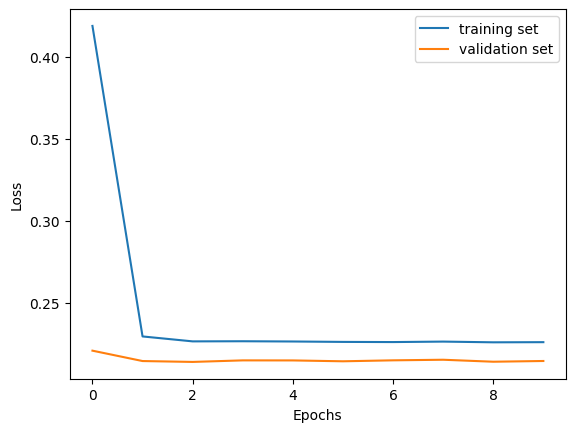

In [85]:
import matplotlib.pyplot as plt

x_epochs = [i for i in range(history.params['epochs'])]
plt.plot(x_epochs, history.history['loss'], x_epochs, history.history['val_loss'])
plt.legend(['training set', 'validation set'])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Binary Accuracy')

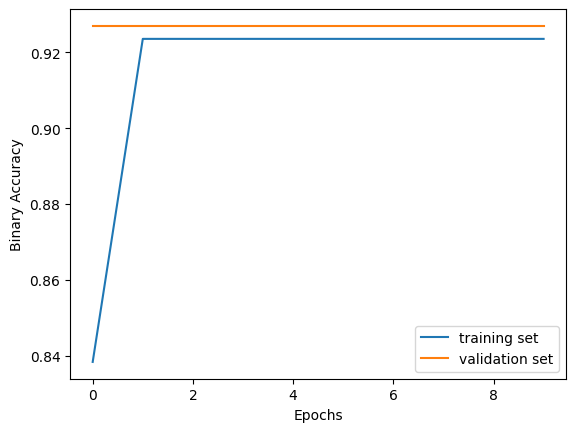

In [86]:
x_epochs = [i for i in range(history.params['epochs'])]
plt.plot(x_epochs, history.history['binary_accuracy'], x_epochs, history.history['val_binary_accuracy'])
plt.legend(['training set', 'validation set'])
plt.xlabel('Epochs')
plt.ylabel('Binary Accuracy')

In [88]:
y_test_pred = model.predict(x_test)
y_test_pred[0], y_test[0]

15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 726ms/step


(array([0.16764095, 0.3002823 , 0.22928871, 0.07224872, 0.32807288,
        0.25625515, 0.11306235, 0.06804945, 0.15304214, 0.02416016,
        0.08646892, 0.21950254, 0.07842697, 0.03991544, 0.01638076,
        0.08177635, 0.10194578, 0.01831654, 0.03169133, 0.08331021,
        0.03183959, 0.0209213 , 0.016313  , 0.00695068, 0.09903056,
        0.08086716, 0.02886771, 0.01224231, 0.00991285, 0.06052864,
        0.0011601 , 0.01302395, 0.00330889, 0.01925127, 0.00325149,
        0.0054592 , 0.00095769], dtype=float32),
 array([0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]))